Paraphrase prediction for given pair of sentence

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:

train_df = pd.read_csv('/content/labeled_final_train.csv')
test_df = pd.read_csv('/content/labeled_final_test.csv')

train_df.head()


,id,sentence1,sentence2,label
0,1,"In Paris , in October 1560 , he secretly met t...","In October 1560 , he secretly met with the Eng...",0
1,2,The NBA season of 1975 -- 76 was the 30th seas...,The 1975 -- 76 season of the National Basketba...,1
2,3,"There are also specific discussions , public p...","There are also public discussions , profile sp...",0
3,4,When comparable rates of flow can be maintaine...,The results are high when comparable flow rate...,1
4,5,It is the seat of Zerendi District in Akmola R...,It is the seat of the district of Zerendi in A...,1


In [3]:

train_df['text'] = train_df['sentence1'] + ' ' + train_df['sentence2']
test_df['text'] = test_df['sentence1'] + ' ' + test_df['sentence2']



In [4]:

train_df.drop_duplicates(inplace=True)
train_df.dropna(inplace=True)



In [5]:

tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_df['text'])
y_train = train_df['label']
X_test = tfidf_vectorizer.transform(test_df['text'])
y_test = test_df['label']



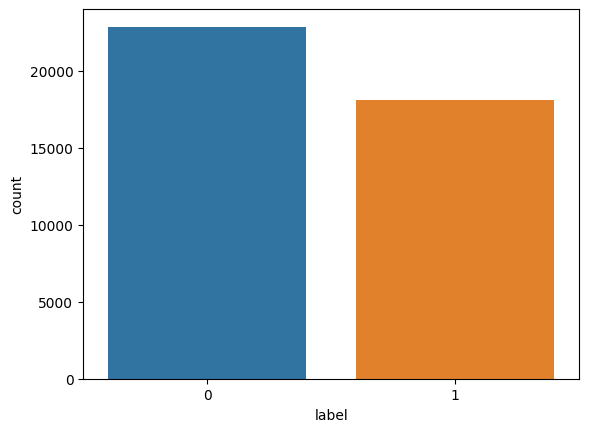

In [6]:

sns.countplot(x='label', data=train_df)
plt.show()



In [7]:

sgd_clf = SGDClassifier(loss='modified_huber', penalty='l2', alpha=0.0001, max_iter=500, random_state=42)
param_grid = {'alpha': [0.0001, 0.001, 0.01], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_sgd_clf = grid_search.best_estimator_



In [8]:

y_test_pred = best_sgd_clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_test_pred))
print("Classification report on test set:\n", classification_report(y_test, y_test_pred))



Accuracy on test set: 0.561625
Classification report on test set:
               precision    recall  f1-score   support

           0       0.57      0.88      0.69      4464
           1       0.51      0.16      0.24      3536

    accuracy                           0.56      8000
   macro avg       0.54      0.52      0.47      8000
weighted avg       0.54      0.56      0.49      8000



In [9]:

input_sentence1 = input('Enter the first sentence: ')
input_sentence2 = input('Enter the second sentence: ')
input_X = tfidf_vectorizer.transform([input_sentence1 + ' ' + input_sentence2])
input_pred = best_sgd_clf.predict(input_X)
print('Prediction:', input_pred[0])
if input_pred[0] == 1:
    print('The input sentences are paraphrases.')
else:
    print('The input sentences are not paraphrases.')

Enter the first sentence: he is a hero of the film
Enter the second sentence: the film he is a hero
Prediction: 1
The input sentences are paraphrases.
